GBDT（Gradient Boosting Decision Tree）：又叫MART（Multiple Additive Regression Tree），一种迭代的决策树算法，该算法由多棵决策树组成，所有树的结论累加起来做最终答案。

#### DT：Regression Decision Tree - 回归树


#### GB：Gradient Boosting - 梯度迭代
- 核心：每一棵树学的是之前所有树结论和的残差，这个残差就是一个加预测值后能得到真实值的累加量。
- 如A的真实年龄是18岁，但第一棵树的预测年龄是12岁，差了6岁，即残差为6岁。那么第二棵树里把A的年龄设为6岁去学习，如果第二棵树真的能把A分到6岁的叶子节点，那累加两棵树的结论就是A的真实年龄；如果第二棵树的结论是5岁，则A仍然存在1岁的残差，第三棵树里A的年龄变成1岁，继续学。即为GB在GBDT中的意义。

训练A、B、C、D四个人，其年龄分别为14、16、24、26。限定叶子节点最多有两个，且限定只学两棵树，结果如下：
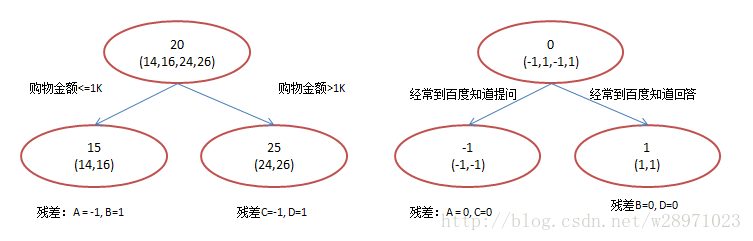
无论训练一棵树时，Cost Function是什么，只要它以误差作为衡量标准，残差向量(-1,1,-1,1)都是它全局最优方向，即Gradient。

- Boosting的最大好处在于，每一步的残差计算其实变相地增大了分错实例的权重，而已经分对的实例则都趋向于0。这样后面的树就能越专注那些前面被分错的实例。

> Boosting在分类问题中，通过改变训练样本的权重（增加分错样本的权重，减小分对样本的权重），学习多个分类器，并将这些分类器线性组合，提高分类器性能。

___
Shrinkage：每次走小步逐渐逼近结果的效果，要比每次迈一大步很快逼近结果的方式更容易避免过拟合。即它不完全相信每一棵残差树，认为每棵树只学到了真理的一小部分，累加的时候只累加一小部分，通过多学几棵树弥补不足。
- 之前：$f_m(x)=f_{m-1}(x)+\sum_{j=1}^Jc_{mj}I(x\in R_{mj})$
- Shrinkage后：$f_m(x)=f_{m-1}(x)+step*\sum_{j=1}^Jc_{mj}I(x\in R_{mj})$

step一般取值0.001~0.01。

#### 适用范围
- 回归问题（线性/非线性）

____
The advantages of GBRT(Gradient Boosted Regression Trees) are:
- Natural handling of data of mixed type (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:
- Scalability, due to the sequential nature of boosting it can hardly be parallelized.

In [8]:
# 分类
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbdt = clf.fit(X_train, y_train)
gbdt.predict_proba(X_test)

array([[0.37010555, 0.62989445],
       [0.97324591, 0.02675409],
       [0.96634369, 0.03365631],
       ...,
       [0.97655489, 0.02344511],
       [0.41395851, 0.58604149],
       [0.06860293, 0.93139707]])

In [26]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
gbdt = clf.fit(X_train, y_train)
gbdt.score(X_test, y_test)

0.8058912110043196

#### 参数说明
- `n_estimators`：回归树的数量
- `max_depth`：每棵独立树的深度
- `loss`：损失函数
- `learning_rate`：学习率

向GBRT添加更多的树，以及更深的深度，可以捕获更多的偏差。模型也更复杂，是以过拟合为代价的。

Gradient boosting控制过拟合的方式：
- tree structure：树的深度基本上控制了特征相互作用的程度。如果想覆盖维度特征和精度特征之间的交叉关系特征，深度至少为2。实战中，深度常为4~6。
- shrinkage：通过`learning_rate`使每棵树预测值进行缓慢学习。较低的学习率需要更大的`n_estimators`，以达到相同程度的训练集误差，即用时间换准确度。
- randomization：1）在构建树之前对训练集进行随机取样（`subsample`）；2）在找到最佳划分节点前对所有特征取样（`max_features`）。
- early stopping

参数优化方式：
1. 根据要解决的问题选择损失函数；
2. `n_estimators`尽可能大；
3. 通过`grid_search`方法对`max_depth`、`learning_rate`、`min_samples_leaf`、及`max_features`进行寻优。
4. 增加`n_estimators`，保持其他参数不变，再次对`learning_rate`调优。

#### 参考链接
[GBDT原理](https://blog.csdn.net/shine19930820/article/details/65633436)

[Gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting)

[Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

[Feature transformations with ensembles of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#example-ensemble-plot-feature-transformation-py)

[GBDT、GBRT与XGBoost](https://blog.csdn.net/u011826404/article/details/76427732)

#### 参考论文
《Greedy Function Approximation_A Gradient Boosting Machine》

《Practical Lessons from Predicting Clicks on Ads at Facebook.pdf》